### Importing Packages

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import seaborn as sns

### Loading the Data

In [68]:
data = pd.read_excel("Data/merged_data.xlsx")
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,Apogee,Perigee,Incl,Arg_Perigee,RAAN
0,-0.462380,-0.336056,-0.105058,-0.372541,-0.352994,-0.224674,-0.374719,0,475.408,1865.520,-2515.55,44.6784,30.9483,275.613
1,-0.040670,-0.168176,-0.075021,-0.379556,-0.260463,-0.492528,-0.339457,0,623.357,1446.770,-3353.21,44.4715,14.5823,275.753
2,-0.477367,-0.027947,-0.491344,-0.254913,-0.057473,-0.444301,-0.426459,0,418.503,599.896,-1438.99,44.4443,-69.9576,275.656
3,-0.109867,-0.486573,-0.167542,-0.010416,-0.265040,-0.234271,-0.427916,0,613.669,1185.510,-1967.14,44.6339,26.5296,275.587
4,-0.452516,-0.091166,-0.241698,-0.451463,-0.171214,-0.266243,-0.406527,0,502.327,1202.480,-2464.61,44.5750,18.9197,275.668


### Overview

- Task at hand involves a Multi-output Regression Problem in the domain of Space and Rocket science.
- The dataset comprises input features: Apogee, Perigee, Inclination, Arg_Perigee, and RAAN.
- The objective is to predict multiple output variables denoted as x1, x2, x3, x4, x5, x6, x7, x8, x9, x10.
- Traditional regression problems typically involve predicting a single target variable, but this scenario requires handling multiple output variables simultaneously.
- Our focus is on developing a specialized model that can effectively capture the relationships between the input features and the diverse set of output variables.
- Success in this task requires employing advanced techniques to ensure accurate predictions for each of the target variables (x1 through x10).
- We will go for the Multi-Output Regression task.

### Data Exploration

In [15]:
##Shape
print(f"Records: {data.shape[0]}\nFeatures: {data.shape[1]}")

Records: 25090
Features: 14


In [16]:
##Overview of missing values
data.isna().any()

x1             False
x2             False
x3             False
x4             False
x5             False
x6             False
x7             False
x8             False
x9             False
Apogee         False
Perigee        False
Incl           False
Arg_Perigee    False
RAAN           False
dtype: bool

In [17]:
##Checking the data types
data.dtypes

x1             float64
x2             float64
x3             float64
x4             float64
x5             float64
x6             float64
x7             float64
x8               int64
x9             float64
Apogee         float64
Perigee        float64
Incl           float64
Arg_Perigee    float64
RAAN           float64
dtype: object

- The dataset comprises 25,090 records and 14 features.
- There is no NULL values in the dataset.
- The dataset size is moderate, making it manageable for analysis and modeling tasks.
- All the features in the dataset is numerical type. 

### Correlation Analysis

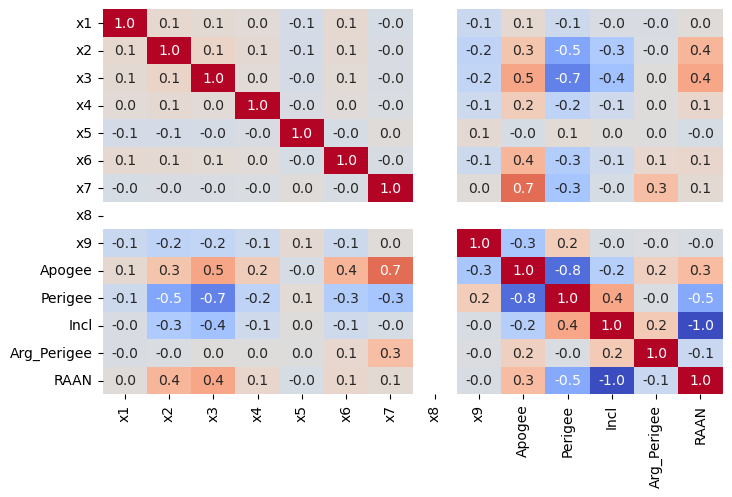

In [22]:
plt.figure(figsize = (8,5))
sns.heatmap(data.corr(), cbar = False, annot = True, fmt=".1f", cmap = 'coolwarm')
plt.show()

- The correlation matrix provides insights into the relationships between input features (Apogee, Perigee, Incl, Arg_Perigee, RAAN) and (x1 to x9) output variables.
- Feature x3 and Perigee exhibit a strong negative correlation of -0.7, indicating a significant linear relationship between them.
- Feature x7 and Apogee exhibit a strong positive correlation of 0.7, indicating a significant linear relationship between them.
- Feature x3 and Apogee exhibit a strong positive correlation of 0.5, indicating a significant linear relationship between them.
- There are interdependencies occurs among the input features. I hope for the multicollinearity let us check. 

### Checking for the multicollinearity

In [98]:
##Creating a new dataframe for the input feature
input_features = ['Apogee','Perigee','Incl','Arg_Perigee','RAAN']
target_features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']
input_data = data[input_features]
input_data

,Apogee,Perigee,Incl,Arg_Perigee,RAAN
0,1865.520,-2515.550,44.6784,30.94830,275.613
1,1446.770,-3353.210,44.4715,14.58230,275.753
2,599.896,-1438.990,44.4443,-69.95760,275.656
3,1185.510,-1967.140,44.6339,26.52960,275.587
4,1202.480,-2464.610,44.5750,18.91970,275.668
...,...,...,...,...,...
25085,2796.190,-2032.580,44.8573,52.59120,275.477
25086,2161.910,-653.540,44.8870,80.90850,275.452
25087,2925.490,-4938.280,44.1261,8.90469,276.037
25088,596.708,-1596.480,44.4124,-67.98040,275.650


In [32]:
##Calculating VIF
vif =pd.DataFrame()
vif['Features'] = input_data.columns
vif['VIF'] = [variance_inflation_factor(input_data.values, i) for i in range(input_data.shape[1])]

In [33]:
vif

,Features,VIF
0,Apogee,14.226819
1,Perigee,14.562253
2,Incl,12579.780161
3,Arg_Perigee,1.252554
4,RAAN,12733.983271


### Interpretation

- Features with VIF values around 1 suggest low correlation with other features.
- Features with VIF values between 1 and 15 are generally considered acceptable.
- Features with VIF values above 15 are indicative of a problematic level of multicollinearity.

In our case, "Incl" and "RAAN" exhibit extremely high VIF values, suggesting a severe multicollinearity issue.

### Data Distribution

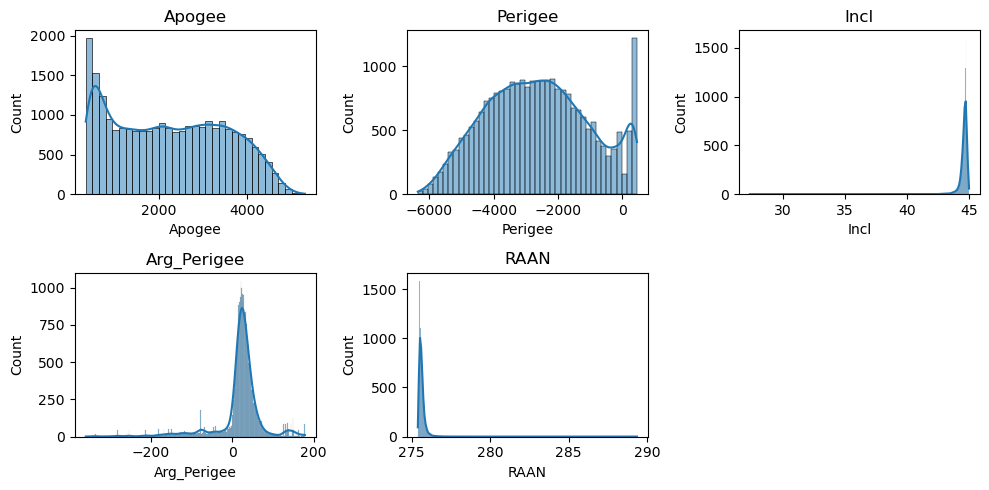

In [42]:
n_rows = 2
n_cols = 3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)

for i, column in enumerate(input_data.columns):
    sns.histplot(data[column], ax=axes[i // n_cols, i % n_cols], kde=True)
    axes[i // n_cols, i % n_cols].set_title(column)
    
for i in range(n_features, n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

##### Apogee
- Shape: Roughly symmetrical, with a slight skew (tail towards higher values).
- Center: The peak of the distribution is around 3000, indicating that most objects have an apogee near this value.
- Spread: The distribution ranges from roughly 2000 to 4000, showing a moderate spread of apogee values.
##### Perigee
- Shape: Roughly symmetrical, with a slight skew.
- Center: The peak of the distribution is around -3000, indicating that most objects have an perigee near this value.
- Spread: The distribution ranges from roughly -6000 to 0.
##### Incl
- Left Skewed distribution.
- Chance of outliers are more.
###### RAAN
- Postive skewed distribution.
- Higher chance of outliers.


### Outlier Detection and Treatment

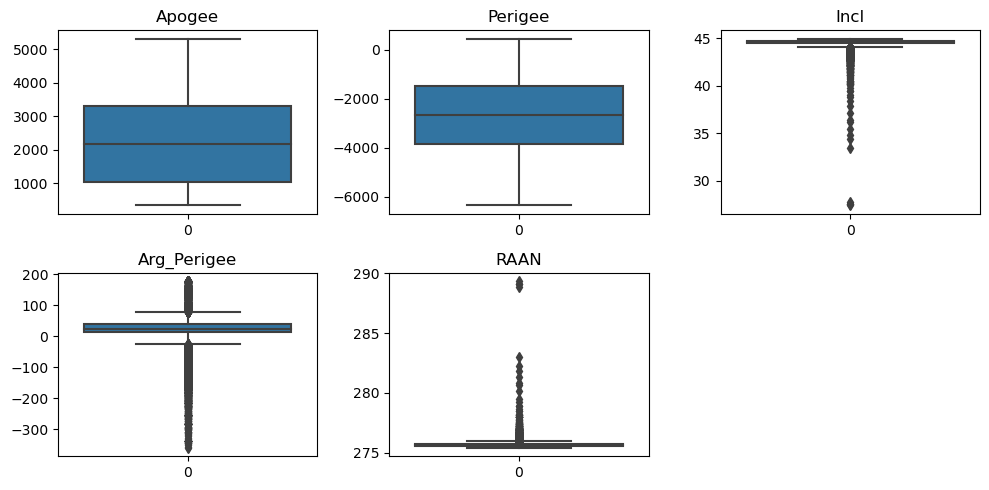

In [95]:
##Plotting the data before outlier treatment
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)

for i, column in enumerate(input_data.columns):
    sns.boxplot(data[column], ax=axes[i // n_cols, i % n_cols])
    axes[i // n_cols, i % n_cols].set_title(column)
    
for i in range(n_features, n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [59]:
##Finding outlier Quantity in the dataset
def find_zscore_outliers(data, threshold=3):
    z_scores = zscore(data)
    outliers = np.where(np.abs(z_scores) > threshold)
    total_samples = len(data)
    percentage_outliers = len(outliers[0]) / total_samples * 100
    return percentage_outliers

for column in input_data.columns:
    percentage_outliers = find_zscore_outliers(input_data[column])
    print(f"Percentage of outliers in {column}: {percentage_outliers:.2f}%")

Percentage of outliers in Apogee: 0.00%
Percentage of outliers in Perigee: 0.00%
Percentage of outliers in Incl: 1.06%
Percentage of outliers in Arg_Perigee: 2.39%
Percentage of outliers in RAAN: 0.79%


In [90]:
##Helper Function to remove outlier points -> Threshold 3
def identify_treat_zscore_outliers(df, col, threshold=3):
    z_scores = zscore(df[col])
    outliers = np.abs(z_scores) > threshold
    df_cleaned = df[~outliers].copy()
    return df_cleaned

In [91]:
clean_data = data.copy()
for feature in input_data.columns:
    clean_data = identify_treat_zscore_outliers(clean_data, feature)

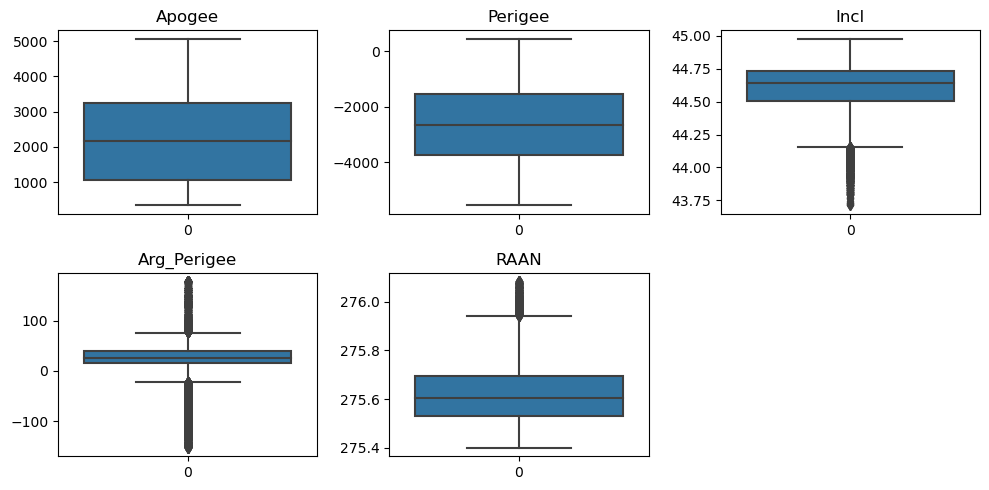

In [94]:
##Plotting the Input Features After Outlier Removal
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)

for i, column in enumerate(input_data.columns):
    sns.boxplot(clean_data[column], ax=axes[i // n_cols, i % n_cols])
    axes[i // n_cols, i % n_cols].set_title(column)
    
for i in range(n_features, n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### Feature Engineering

In [123]:
## Dependent and independent Variable Selection
X = clean_data[input_features]
y = clean_data[target_features]

In [124]:
##Training and Testing Splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
print(f"X Training Shape: {X_train.shape}\nX Testing Set Shape: {X_test.shape}\nY Training Shape: {y_train.shape}\nY Testing Set Shape: {y_test.shape}")

X Training Shape: (19019, 5)
X Testing Set Shape: (4755, 5)
Y Training Shape: (19019, 9)
Y Testing Set Shape: (4755, 9)


In [126]:
## Feature Scalling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###### The Choice for choosing z-score Scaler
- Centers the data around zero and scales it based on the standard deviation.
- Does not bound the data to a specific range.
- Maintains the shape of the distribution and is less affected by outliers.

### Helper Function for Benchmarking

In [135]:
def showResults(y_true, y_pred, count = 5):
  print("R2 score: ",r2_score(y_true,y_pred))
  print("Mean squared error: ",mean_squared_error(y_true,y_pred))
  print("Mean absolute error: ",mean_absolute_error(y_true,y_pred))

### Model Building

In [150]:
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from xgboost import XGBRegressor

##### Linear Regression

In [136]:
linear = LinearRegression()
linear.fit(X_train,y_train)
showResults(y_test,linear.predict(X_test))

R2 score:  0.35803219134096503
Mean squared error:  401.0701022225267
Mean absolute error:  5.130443202613242


##### Random forest regressor

In [140]:
rdf = RandomForestRegressor()
rdf.fit(X_train,y_train)
showResults(y_test,rdf.predict(X_test))

R2 score:  0.45103649754183256
Mean squared error:  69.22740853974315
Mean absolute error:  2.040756567996542


##### Extra trees regressor

In [143]:
extra_reg = ExtraTreesRegressor()
extra_reg.fit(X_train,y_train)
showResults(y_test,extra_reg.predict(X_test))

R2 score:  0.4421253164592703
Mean squared error:  56.146768551111755
Mean absolute error:  1.7976676039198642


##### K-neighbours regressor

In [145]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
showResults(y_test,knn.predict(X_test))

R2 score:  0.290554204358734
Mean squared error:  387.56110235266897
Mean absolute error:  4.977903489983586


##### SVM

In [147]:
svm_multi = MultiOutputRegressor(SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))
svm_multi.fit(X_train,y_train)
showResults(y_test,svm_multi.predict(X_test))

R2 score:  0.18229067828734818
Mean squared error:  391.89092244188697
Mean absolute error:  4.850288694995988


##### LGB

In [152]:
lgb_model = lgb.LGBMRegressor(learning_rate=0.05, n_estimators=100)
lmodel = MultiOutputRegressor(lgb_model)
lmodel.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 19019, number of used features: 5
[LightGBM] [Info] Start training from score -0.259028
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 19019, number of used features: 5
[LightGBM] [Info] Start training from score -0.267671
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 19019, number of used features: 5
[LightGBM] [Info] Start trai

MultiOutputRegressor(estimator=LGBMRegressor(learning_rate=0.05))

In [153]:
showResults(y_test,lmodel.predict(X_test))

R2 score:  0.4586573599978985
Mean squared error:  178.5260527078729
Mean absolute error:  3.3469101126997813


##### XGBRegressor(tree_method='hist')

In [154]:
xgb_regressor = XGBRegressor(tree_method='hist')
xgb_reg = MultiOutputRegressor(xgb_regressor)
xgb_reg.fit(X_train, y_train)
showResults(y_test,xgb_reg.predict(X_test))

R2 score:  0.47991676385719995
Mean squared error:  66.95788451887051
Mean absolute error:  2.034324102299003


1. **Linear Regression:**
   - R2 Score: 0.36
   - Mean Squared Error: 401.07
   - Mean Absolute Error: 5.13

2. **Random Forest Regressor:**
   - R2 Score: 0.45
   - Mean Squared Error: 69.23
   - Mean Absolute Error: 2.04

3. **Extra Trees Regressor:**
   - R2 Score: 0.44
   - Mean Squared Error: 56.15
   - Mean Absolute Error: 1.80

4. **K-Neighbours Regressor:**
   - R2 Score: 0.29
   - Mean Squared Error: 387.56
   - Mean Absolute Error: 4.98

5. **Support Vector Machine (SVM):**
   - R2 Score: 0.18
   - Mean Squared Error: 391.89
   - Mean Absolute Error: 4.85

6. **LightGBM (Gradient Boosting):**
   - R2 Score: 0.46
   - Mean Squared Error: 178.53
   - Mean Absolute Error: 3.35

7. **XGBoost Regressor:**
   - R2 Score: 0.48
   - Mean Squared Error: 66.96
   - Mean Absolute Error: 2.03

**Overall Inference:**
- The ensemble methods (Random Forest, Extra Trees, LightGBM, XGBoost) generally outperform simpler models (Linear Regression, k-Neighbours, SVM).
- XGBoost demonstrates the best overall performance with the highest R2 score and lowest errors.
- Random Forest and Extra Trees also perform well, providing a good balance between accuracy and computational efficiency.
- LightGBM shows competitive performance but with slightly higher errors compared to XGBoost.

In conclusion, XGBoost appears to be the most effective model in this case

### Saving and Loading the best Model

In [157]:
pickle.dump(xgb_reg, open('Model/xgb_reg.pkl', 'wb'))

In [159]:
pickled_model = pickle.load(open('Model/xgb_reg.pkl', 'rb'))
showResults(y_test,pickled_model.predict(X_test))

R2 score:  0.47991676385719995
Mean squared error:  66.95788451887051
Mean absolute error:  2.034324102299003
